Accuracy: 87.50%

Matriz de Confusión:
[[99 12]
 [13 76]]


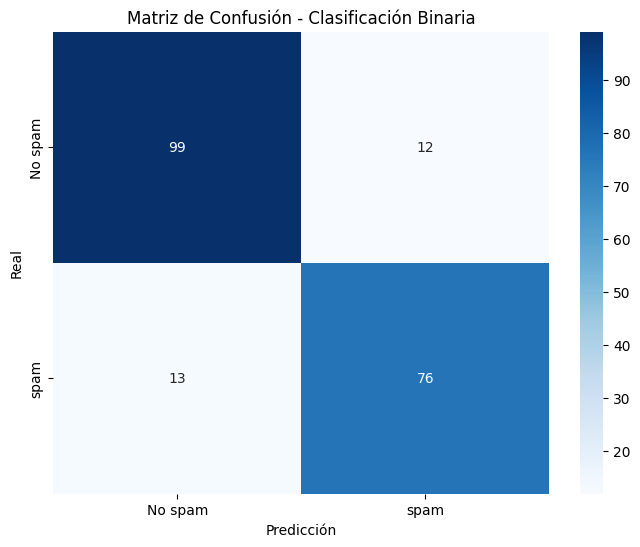

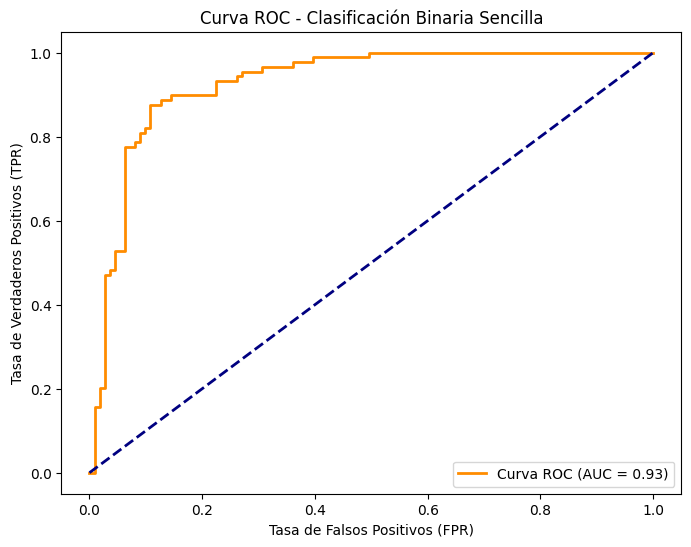

AUC: 0.93


In [7]:
#Suponemos un clasificador binario. En este caso podríamos suponer que los datos pueden representar correos de spam(clase 1) o no (clase 0)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Generar un dataset sintético para clasificación binaria
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=10000)

# Entrenar el modelo con el conjunto de entrenamiento
log_reg.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No spam", "spam"], yticklabels=["No spam", "spam"])
plt.title('Matriz de Confusión - Clasificación Binaria')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Realizar predicciones con el conjunto de prueba (probabilidades) para ROC
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (1)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC (Área Bajo la Curva)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea aleatoria (AUC = 0.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificación Binaria Sencilla')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')


